In [327]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [328]:
# Get the current working directory
cw = os.getcwd()

# Get the parent directory
parent = os.path.dirname(cw)

# Database directory
db = parent + '/database'

# Data file
df_airline = pd.read_csv(db + '/international-airline-passengers.csv')

In [329]:
# Display Information
print(df_airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


In [330]:
# Convert the date column to datetime
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

# Set the index to the date column
df_airline.set_index('Month', inplace=True)

# Display Information
print(df_airline.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


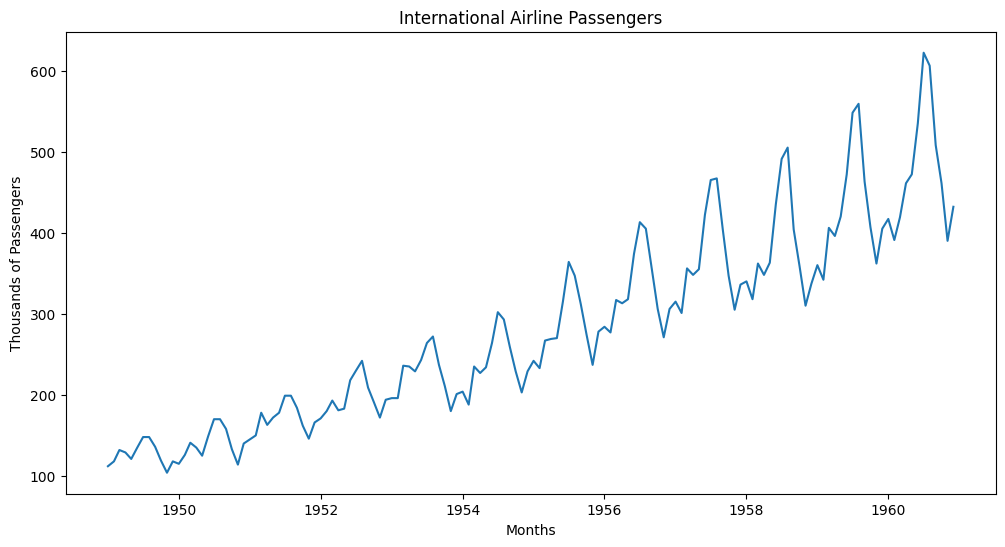

In [331]:
# Plot the data
plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(df_airline)
plt.xlabel('Months')
plt.ylabel('Thousands of Passengers')
plt.title('International Airline Passengers')
plt.show()

### Use Dickey-fuller Test

In [332]:
# Define the function to test for stationarity
def test_stationarity(timeseries):
    # Determine the rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(12, 6))
    fig = plt.gcf()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Print the Conditions
    if dfoutput.iloc[1] <= 0.05:
        print('\nStrong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('\nWeak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')


# Define the function to test for stationarity
def test_stationarity_seasonal (timeseries, column = 'Thousands of Passengers'):
    # Determine the rolling statistics
    rolmean = timeseries[column].rolling(window=12).mean()
    rolstd = timeseries[column].rolling(window=12).std()

    # Plot the rolling statistics
    plt.figure(figsize=(12, 6))
    fig = plt.gcf()
    plt.plot(timeseries[column], color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[column], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',  '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput) 

    # Print the Conditions
    if dfoutput.iloc[1] <= 0.05:
        print('\nStrong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('\nWeak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')
    

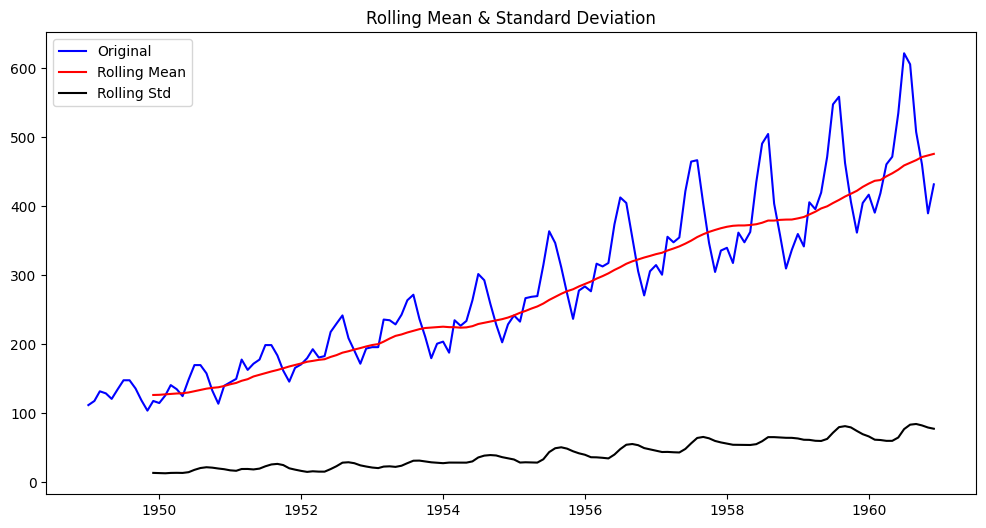

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [333]:
# Test for stationarity
test_stationarity(df_airline)

### Use Differencing Technique

            Thousands of Passengers
Month                              
1949-02-01                      6.0
1949-03-01                     14.0
1949-04-01                     -3.0
1949-05-01                     -8.0
1949-06-01                     14.0


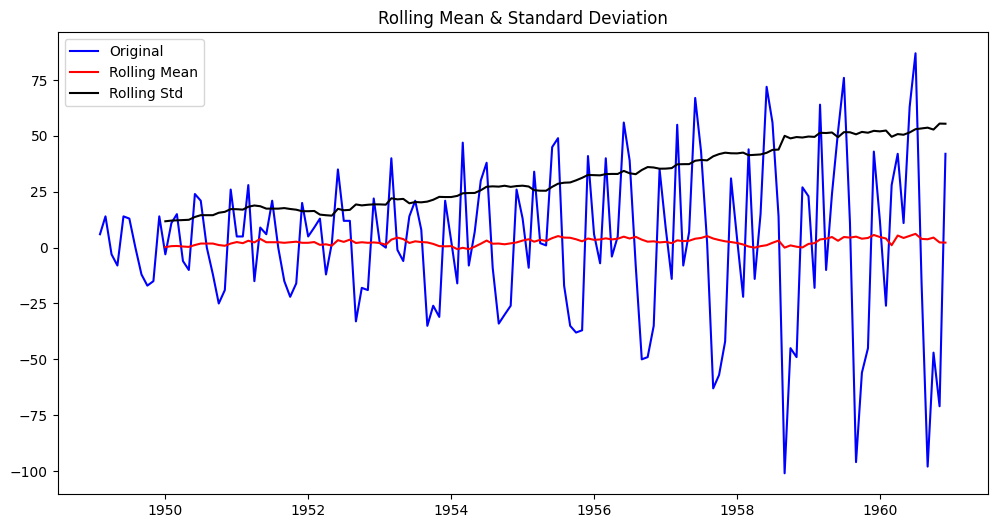

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [334]:
# Shift the data by 1
df_airline_shift = df_airline - df_airline.shift(1)

# Drop the missing values
df_airline_shift.dropna(inplace=True)

# Print the first 5 rows
print(df_airline_shift.head())

# Test for stationarity
test_stationarity(df_airline_shift)

            Thousands of Passengers
Month                              
1949-03-01                     20.0
1949-04-01                     11.0
1949-05-01                    -11.0
1949-06-01                      6.0
1949-07-01                     27.0


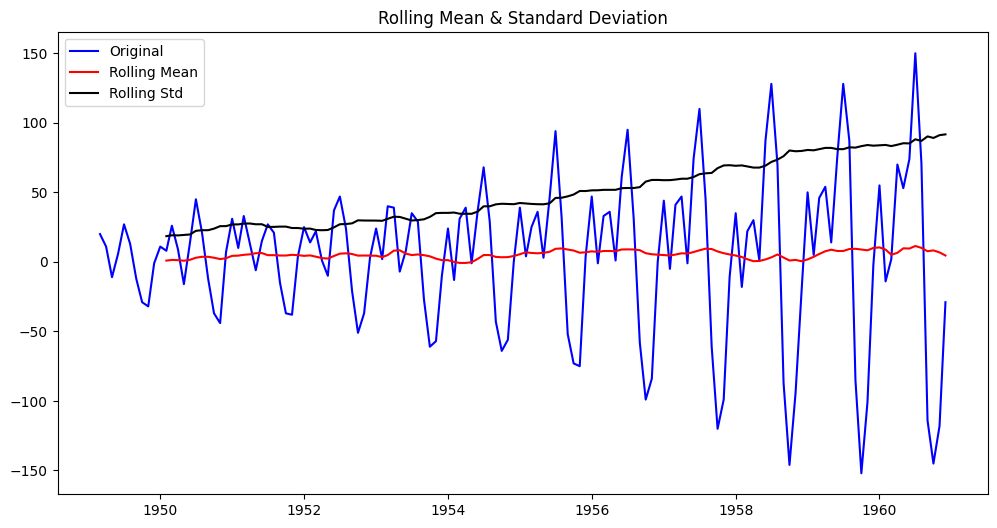

Results of Dickey-Fuller Test:
Test Statistic                  -2.961695
p-value                          0.038630
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [335]:
# Shift the data by 2
df_airline_shift2 = df_airline - df_airline.shift(2)

# Drop the missing values
df_airline_shift2.dropna(inplace=True)

# Print the first 5 rows
print(df_airline_shift2.head())

# Test for stationarity
test_stationarity(df_airline_shift2)

            Thousands of Passengers  Thousands of Passengers (Seasonal Shift)
Month                                                                        
1950-01-01                      115                                       3.0
1950-02-01                      126                                       8.0
1950-03-01                      141                                       9.0
1950-04-01                      135                                       6.0
1950-05-01                      125                                       4.0


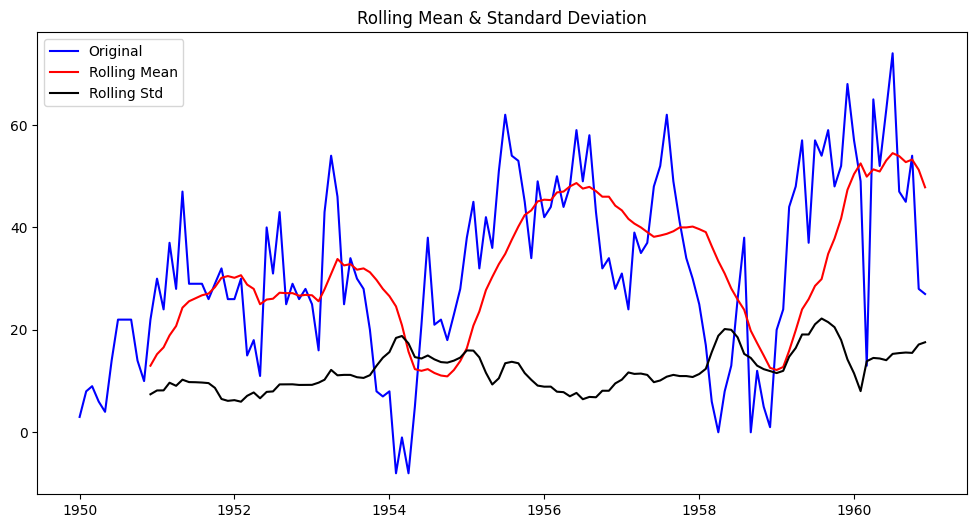

Results of Dickey-Fuller Test:
Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [336]:
# Copy the original data
df_airline_shift12 = df_airline.copy()

# Seasonal Shift
df_airline_shift12 ['Thousands of Passengers (Seasonal Shift)'] = df_airline ['Thousands of Passengers'] - df_airline ['Thousands of Passengers'].shift(12)

# Drop the missing values
df_airline_shift12.dropna(inplace=True)

# Print the first 5 rows
print(df_airline_shift12.head())

# Test for stationarity
test_stationarity_seasonal(df_airline_shift12, 'Thousands of Passengers (Seasonal Shift)')

### Plot Auto Correlation and Partial Auto Correlation

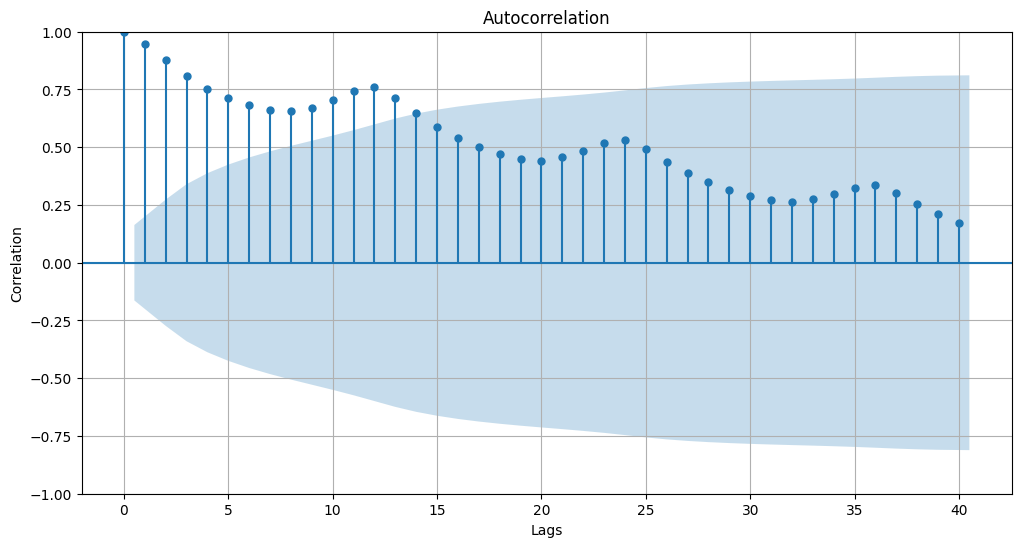

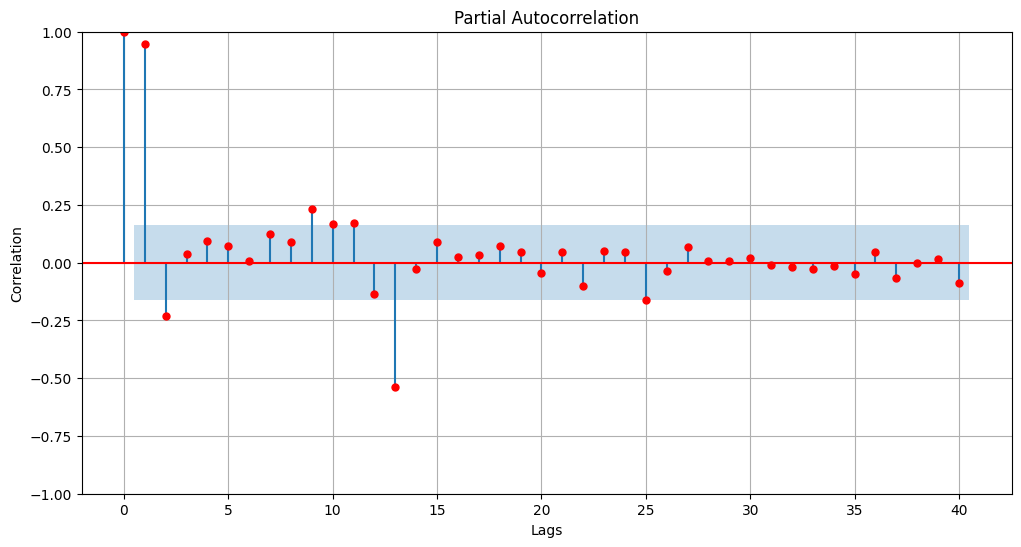

In [337]:
# Plot DF
plot_df = df_airline

# Plot the seasonal ACF in Blue
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_acf(plot_df, lags=40, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Plot the seasonal PACF with line in red
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_pacf(plot_df, lags=40, ax=plt.gca(), color='red')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

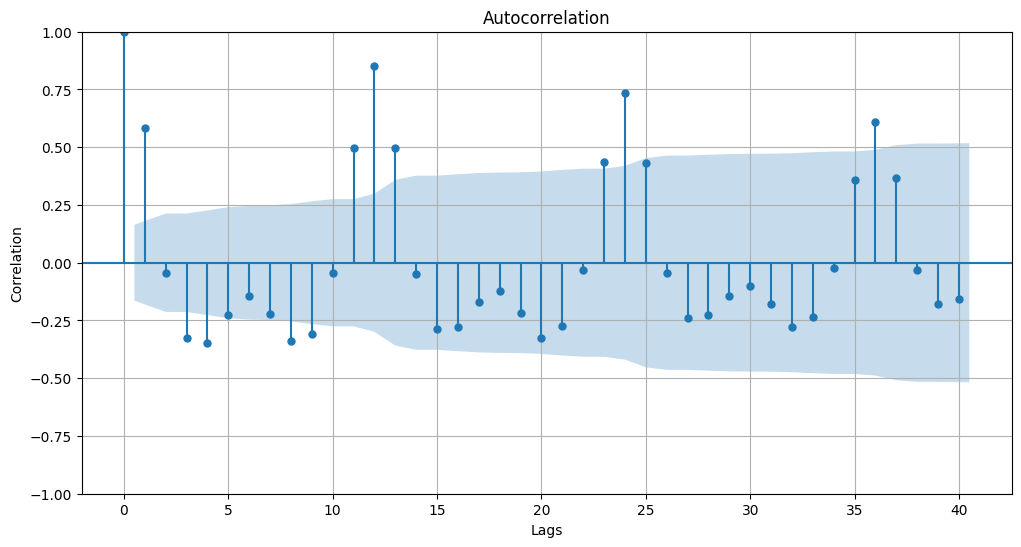

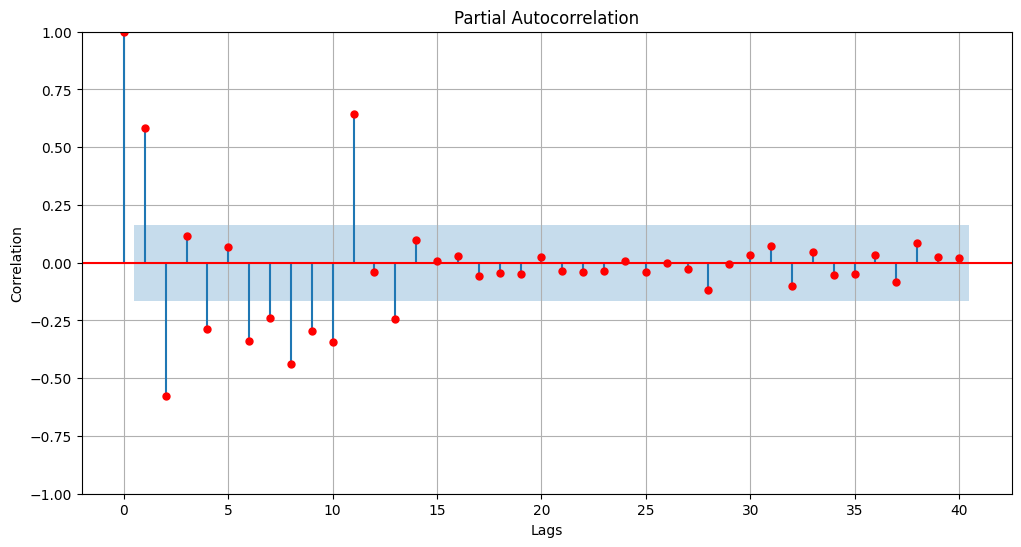

In [338]:
# Plot DF
plot_df = df_airline_shift2

# Plot the seasonal ACF in Blue
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_acf(plot_df, lags=40, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Plot the seasonal PACF with line in red
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_pacf(plot_df, lags=40, ax=plt.gca(), color='red')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

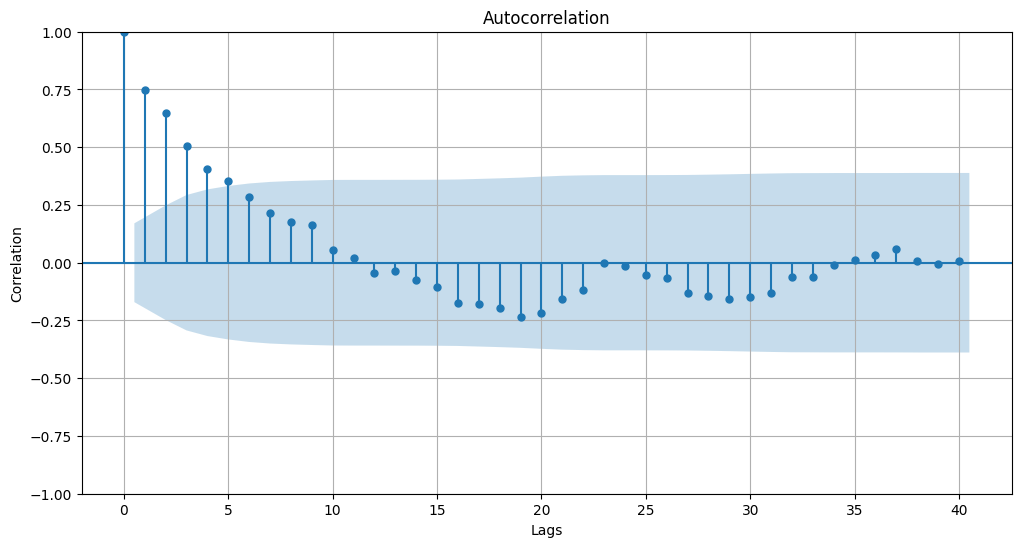

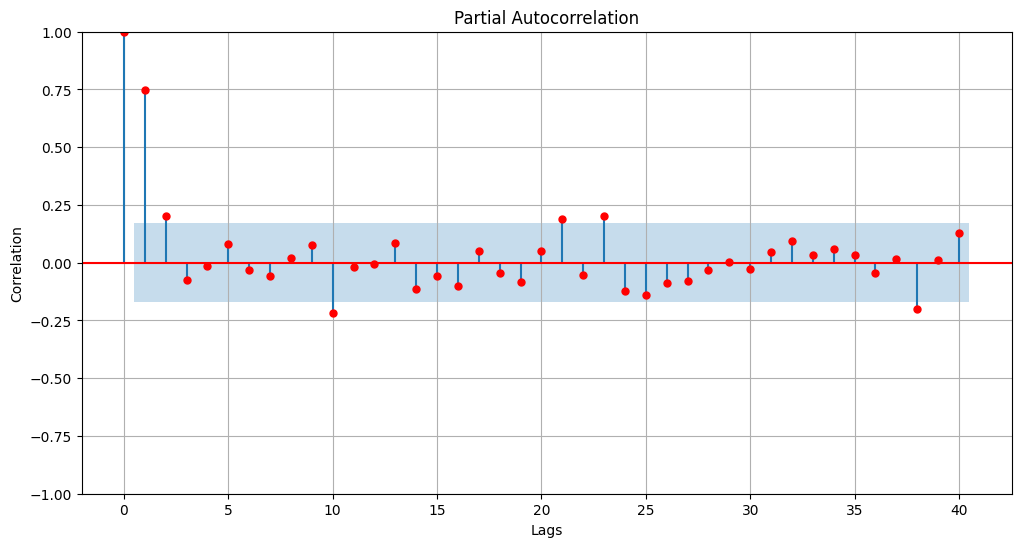

In [339]:
# Plot DF
plot_df = df_airline_shift12 ['Thousands of Passengers (Seasonal Shift)']

# Plot the seasonal ACF in Blue
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_acf(plot_df, lags=40, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Plot the seasonal PACF with line in red
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sm.graphics.tsa.plot_pacf(plot_df, lags=40, ax=plt.gca(), color='red')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Split the Train and Test Data

In [340]:
# Train Data
train_dataset_end = datetime(1955, 12, 1)
train_dataset = df_airline_shift12[:train_dataset_end]

# Test Data
test_dataset_start = train_dataset_end + timedelta(days=1)
test_dataset_end = datetime(1960, 12, 1)
test_dataset = df_airline_shift12[test_dataset_start:test_dataset_end]

# Predictions Data
predictions_start = test_dataset.index[0]
predictions_end = test_dataset.index[-1]

In [341]:
train_dataset

,Thousands of Passengers,Thousands of Passengers (Seasonal Shift)
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1955-08-01,347,54.0
1955-09-01,312,53.0
1955-10-01,274,45.0


# ARIMA Model

In [342]:
# Define order
p = 3
d = 2
q = 2

# Model ARIMA
model_arima = ARIMA(train_dataset ['Thousands of Passengers'].asfreq('MS'), order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
model_arima_fit = model_arima.fit(method_kwargs={"maxiter": 500})

In [343]:
# Summary
print(model_arima_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                   72
Model:                      ARIMA(3, 2, 2)   Log Likelihood                -303.001
Date:                     Sat, 22 Feb 2025   AIC                            618.002
Time:                             12:09:42   BIC                            631.230
Sample:                         01-01-1950   HQIC                           623.236
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6970      0.165     -4.229      0.000      -1.020      -0.374
ar.L2          0.0034      0.185      0.018      0.986      -0.359       0.365
ar.L3       

In [344]:
# Print the prediction Start and End Dates
print('Predictions Start Date: ', predictions_start)
print('Predictions End Date: ', predictions_end)

# Predictions
predictions = model_arima_fit.predict(start=predictions_start, end=predictions_end)
residuals = test_dataset ['Thousands of Passengers'] - predictions

Predictions Start Date:  1956-01-01 00:00:00
Predictions End Date:  1960-12-01 00:00:00


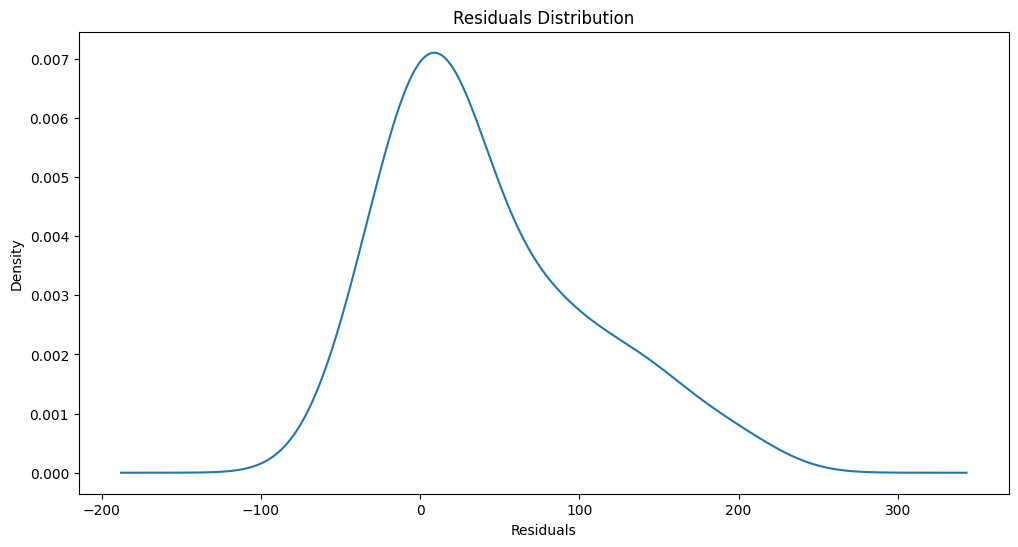

In [345]:
# Plot the residuals distribution in kernel density
plt.figure(figsize=(12, 6))
fig = plt.gcf()
residuals.plot(kind='kde')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution')
plt.show()

In [346]:
print (predictions)

1956-01-01    289.586957
1956-02-01    286.112117
1956-03-01    292.007612
1956-04-01    291.709563
1956-05-01    295.958454
1956-06-01    296.893801
1956-07-01    300.235601
1956-08-01    301.829037
1956-09-01    304.692844
1956-10-01    306.633609
1956-11-01    309.245048
1956-12-01    311.369181
1957-01-01    313.847386
1957-02-01    316.068325
1957-03-01    318.476191
1957-04-01    320.748238
1957-05-01    323.118970
1957-06-01    325.417999
1957-07-01    327.769126
1957-08-01    330.082399
1957-09-01    332.423177
1957-10-01    334.743970
1957-11-01    337.079283
1957-12-01    339.404046
1958-01-01    341.736475
1958-02-01    344.063334
1958-03-01    346.394240
1958-04-01    348.722206
1958-05-01    351.052308
1958-06-01    353.380858
1958-07-01    355.710535
1958-08-01    358.039393
1958-09-01    360.368847
1958-10-01    362.697868
1958-11-01    365.027203
1958-12-01    367.356310
1959-01-01    369.685583
1959-02-01    372.014735
1959-03-01    374.343975
1959-04-01    376.673151


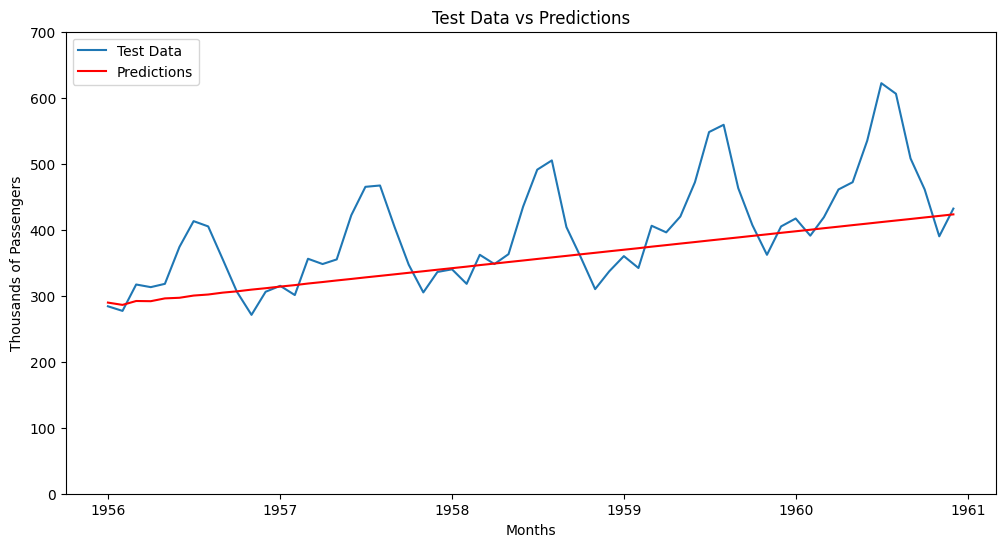

In [347]:
# Plot the test data and predictions
plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(test_dataset ['Thousands of Passengers'], label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Months')
plt.ylabel('Thousands of Passengers')
plt.title('Test Data vs Predictions')
plt.legend(loc='best')
#y_limits
plt.ylim(0, 700)
plt.show()

# SARIMAX Model

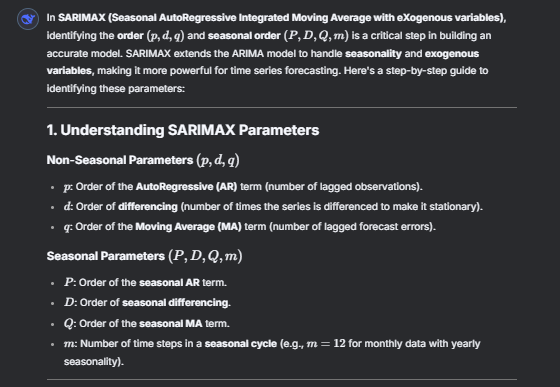
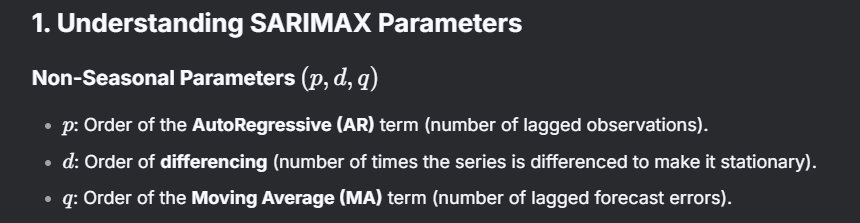

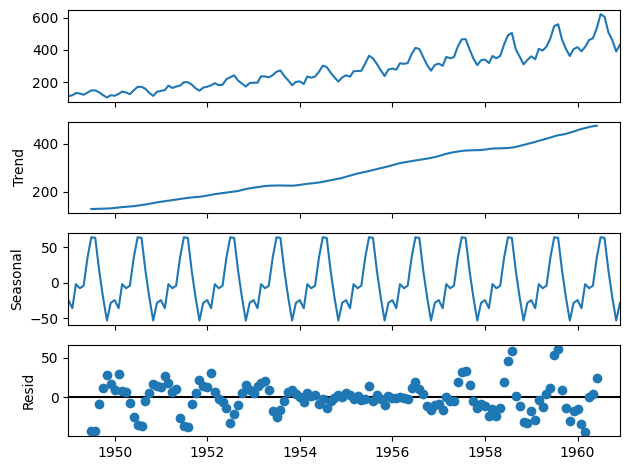

In [348]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_airline, model='additive', period=12)
decomposition.plot()
plt.show()

In [349]:
p, d, q = 3, 2, 2  # Adjusted based on ACF/PACF
seasonal_order = (1, 1, 1, 12)  # Simplified seasonal component

model_sarima = SARIMAX(train_dataset['Thousands of Passengers'].asfreq('MS'), 
                       order=(p, d, q), 
                       seasonal_order=seasonal_order, 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                   72
Model:             SARIMAX(3, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -163.800
Date:                              Sat, 22 Feb 2025   AIC                            343.601
Time:                                      12:09:43   BIC                            357.690
Sample:                                  01-01-1950   HQIC                           348.796
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0669      0.797      0.084      0.933      -1.495       1.629
ar.L2         -0.01

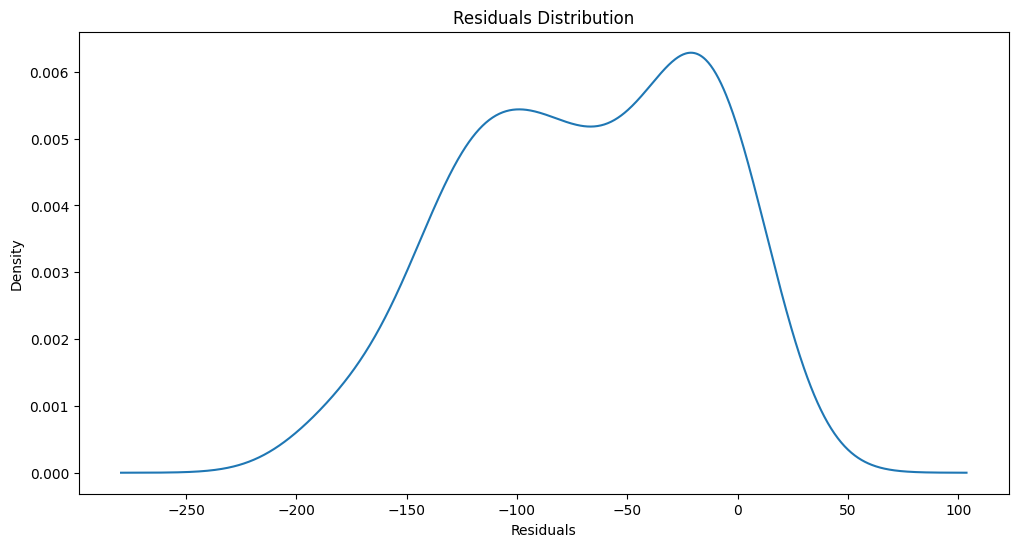

In [350]:
# Predictions
sarima_predictions = model_sarima_fit.predict(start=predictions_start, end=predictions_end)
sarima_residuals = test_dataset ['Thousands of Passengers'] - sarima_predictions

# Plot the residuals distribution in kernel density
plt.figure(figsize=(12, 6))
fig = plt.gcf()
sarima_residuals.plot(kind='kde')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution')
plt.show()

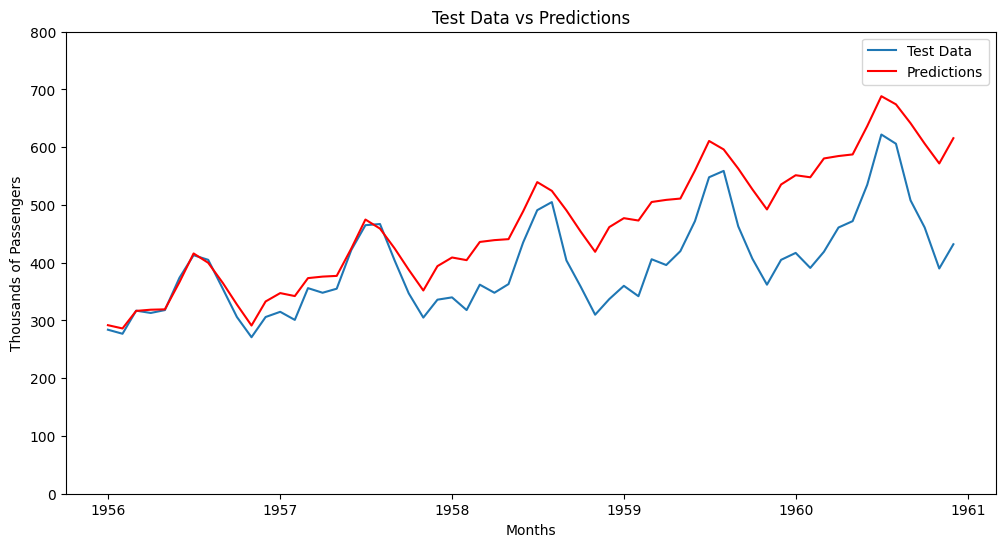

In [351]:
# Plot the test data and predictions
plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(test_dataset ['Thousands of Passengers'], label='Test Data')
plt.plot(sarima_predictions, color='red', label='Predictions')
plt.xlabel('Months')
plt.ylabel('Thousands of Passengers')
plt.title('Test Data vs Predictions')
plt.legend(loc='best')
#y_limits
plt.ylim(0, 800)
plt.show()

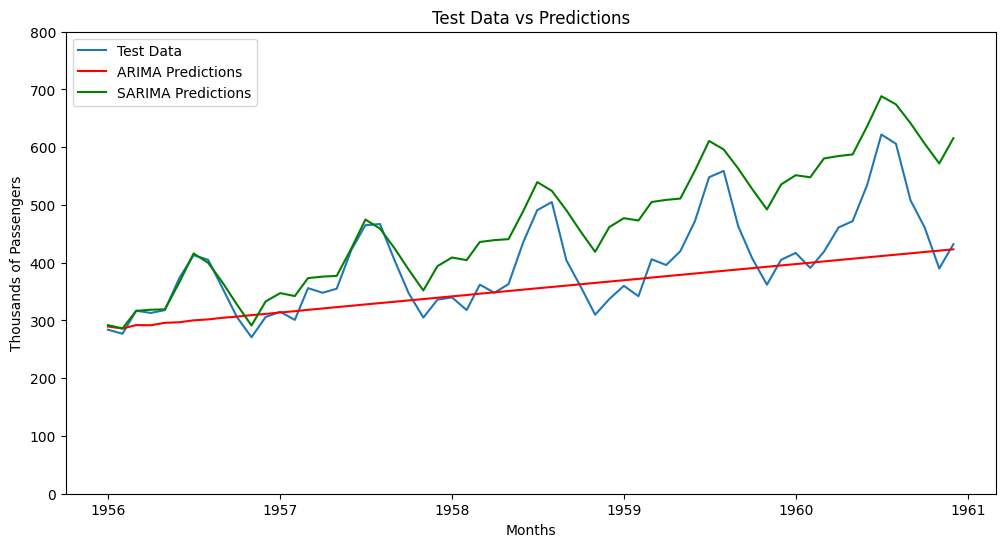

In [352]:
# Plot Both Models
plt.figure(figsize=(12, 6))
fig = plt.gcf()
plt.plot(test_dataset ['Thousands of Passengers'], label='Test Data')
plt.plot(predictions, color='red', label='ARIMA Predictions')
plt.plot(sarima_predictions, color='green', label='SARIMA Predictions')
plt.xlabel('Months')
plt.ylabel('Thousands of Passengers')
plt.title('Test Data vs Predictions')
plt.legend(loc='best')
#y_limits
plt.ylim(0, 800)
plt.show()